# What's under the hood

walk through what's under the hood: having a good understand can help you quickly in on the appropriate model

we will start with simplest models *Linear Regression* . discuss 2 very different ways to train it
* using a direct *closed-form* equation that computes model parameters to best fit to training set
* using an iterative optimizer *Gradient Descent (GD)* that gradually tweaks the parameters to minimize the cost function
: Batch GD, Mini-batch GD and Stochastic GD


then we will look at *Polynomial Regression* a more complex model that can fit non-linear datasets. it's more prone to overfitting, then we will look at *Regularization* that can reduce the risk of over fitting

and finally, look at are commonly for classification task: *Logistic Regression* and *Softmax Regression*

## Linear Regression

*y = (m1x1) + (m2x2) + ... + bias*

*y = Mx + b* ; M is weights of all input(x) and b is bias of the neuron

**mean squared error (MSE)** cost fuction for a Linear Regression model


>What is a Cost Function?:
A cost function is a formula used to predict the cost that will be experienced at a certain activity level. 

The Normal Equation :
* fine the θ  value that minimizes the cost function
* : θ  = (X.T X)**-1 X.T y


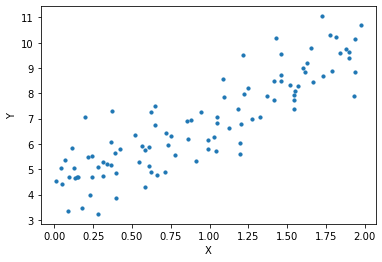

In [43]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2*np.random.rand(100,1) # rand = [0,1] shape = 100,1
y = 4+3*X + np.random.randn(100,1) # randn = standard noramal

plt.scatter(X,y,s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Now let's compute θ using *Normal Equation* 
* np.linalg.inv : inverse of matrix
* dot : matrix multiplication

In [44]:
X[:4,:]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697]])

In [45]:
X_b = np.c_[np.ones((100,1)),X] # X0 = 1 for each instance
X_b[:4,:]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697]])

In [46]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

> generate the data is *y = 4 + 3X + Guassian noise*

> Gaussian noise is a type of random noise that has a probability density function (PDF) that is defined by a normal distribution with a mean of zero.
* we get θ = 4.214 and 2.77 because noise made it hard to find θ = 4 and 3

make prediction with our θ

In [47]:
X_new  = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # X0 = 1 for each instance
y_predict = X_new_b.dot(theta_best)
X_new, y_predict


(array([[0],
        [2]]),
 array([[4.21509616],
        [9.75532293]]))

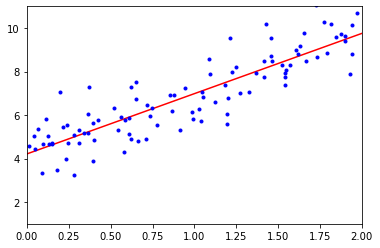

In [48]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,1,11]) # scale x = 0->2 y = 1->11
plt.show()

Perfoming Linear Regression using Scikit-Learn is simple

In [49]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.intercept_, linear_model.coef_

(array([4.21509616]), array([[2.77011339]]))

> that is θ that we have found

In [50]:
linear_model.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [51]:
def predict_linear(x):
    # y = Mx + b
    predicton = linear_model.coef_*x + linear_model.intercept_
    return predicton
predict_linear([0,2])

array([[4.21509616, 9.75532293]])

Now we will look at a very different way to train a Linear Regression model, which is better suited for cases where there are a large number of features or to manay traning instance to fit in memory

## Gradient Descent

*GradientDescent* is tweak parameters iteratively in order to minimize a cost function

suppose you are lost in the mountains in a dense fog. you can only feel slope by your feet. if you have exactly step(*learning rate*) you can quickly go downhill.

Concretely, you start with a random values(called *random initialization*). then improve gradually, taking one by baby step at a time, each step attempting to decrease cost function (e.g. the MSE) until *converges to a minimium.*

but it's not easy if the random initialuzation with not good position on the mountain. it will converge to a *local mninmum*. which is not as good as the *global minimum*.

fortunately the MSE cost function, if you pick any two point the line segment joining them never crosses the curve.this implies that thre are no local minima.

**WARNING :** when using GradientDescent, you shold have a similar scale of all features (e.g. using *Scikit-Learn's StandardScaler*) or it will take much to converge.

**Batch Gradient Descent** : to implement Gradient Descent, need to compute the gradient of the cost function(how mush the cost fuction will change if you change θ a little bit. this called a *partial derivative*), it uses the whole vatch of training data at every step(actaully, *Full Gradient Descent* would a better name)

**Equation** : θnext = θ - ηΔMSE

In [52]:
def Gradient_Descent(eta):
    eta = eta # learning rate
    epoch = 1000
    m = 100 # len data
    theta = np.random.randn(2,1) # random initializtion shape=(2,1)

    for iteration in range(epoch):
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - (eta*gradient)

    return theta

Gradient_Descent(.1)

array([[4.21509616],
       [2.77011339]])

> that's exactly what the Normal Equation found!, but what if we use diffenrent learning rate

In [53]:
print('η = 0.02 \n',Gradient_Descent(.02))
print('η = 0.1 \n',Gradient_Descent(.1))
print('η = 0.5 \n',Gradient_Descent(.5))

η = 0.02 
 [[4.21235214]
 [2.7725362 ]]
η = 0.1 
 [[4.21509616]
 [2.77011339]]
η = 0.5 
 [[-7.92078232e+27]
 [-8.97086062e+27]]


**Stochastic Gradient Descent** : main problem with Batch GD is it uses the whole training set to compute the gradeints at every step, which makes it very slow when is large scale.
Stochastic GD picks a random instance in the training set at every step and compute the gradients based on that single instance.

but Stochatic will bounce around, so finally parameters values are good, but not oprtimal. but its will jump out of local minimum to find global minimum. This process is akin to *simulated annealing*. The function that determines the leraning rate at each iteration is called *Learning Schedule*

In [54]:
epoch = 50
t0, t1 = 5, 50 # Learning Schedule
m = 100
theta = np.random.randn(2,1)

def learning_schedule(t):
    return t0 / (t + t1)

for iteration in range(epoch) :
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradient = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(iteration * m+i)
        theta = theta - (eta*gradient)

theta

array([[4.17911507],
       [2.72630443]])

Using Stochastic GD with Scikit-Learn

In [55]:
from sklearn.linear_model import SGDRegressor

'''
tol : tolerance , if nothing improve will stop
penalty = None ; not use any regularization(in order to minimize the adjusted 
          loss function and prevent overfitting or underfitting)
eta0 = learing shedule
'''
SGD_model = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.1)
SGD_model.fit(X,y.ravel()) # change y to 1d array

SGDRegressor(eta0=0.1, penalty=None)

In [56]:
SGD_model.intercept_, SGD_model.coef_

(array([4.13793311]), array([2.71708528]))

> that was close at the **Theta** we found

**Mini-batch Gradient Descent** : compute the gradient on small random sets of instance. Mini-batch have advantage over SGD is that you can get performance boost from GPUs.

* will walking closer to minimum than SGD
* but suffer from go out local minima

## Polynomial Regression

what if data is more complex than a  straight line?, you can use *LinearModel* to fit non-linear data but add power of each feature as new feature.this is called *PolynomialRegression*

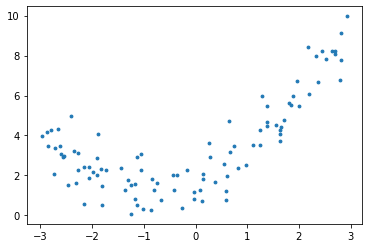

In [57]:
m = 100
np.random.seed(42)
X = 6*np.random.rand(m,1) - 3
y = (.5 * X**2) + X + 2 + np.random.randn(m,1)

plt.scatter(X,y,s=8);

Let's adding the square of each feature 

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[:2], X_poly[:2] 

(array([[-0.75275929],
        [ 2.70428584]]),
 array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ]]))

> X_poly now contain original of X plus the square of this. Now can fit a LinearREgression

In [59]:
linear_model = LinearRegression()
linear_model.fit(X_poly, y)
linear_model.intercept_, linear_model.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

> y = .5X**2 + X + 2 + Guassim noise
* estimate to : .56X**2 + .93X + 1.78

In [60]:
pred = linear_model.coef_[0][1]*X**2 + linear_model.coef_[0][0]*X + linear_model.intercept_
pred[:5] == linear_model.predict(X_poly)[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

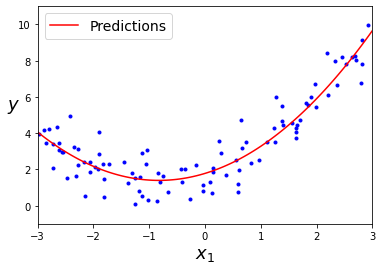

In [61]:
X_new= np.linspace(-3, 3, 100).reshape(100, 1) # create X
X_new_poly = poly_features.transform(X_new)
y_new = linear_model.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-",label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, -1, 11])
plt.show()

### Learning Curves

if we use high-degree model is severely overfitting in the trainning data, while the lineare model is underfitting. but in fact you don;t know what function generated the data, so how can you decide how complex model should be? How can tell is ovetfitting or underfitting?

*Leraning Curves*: these are plots of the model's performance on the training set and the validation set

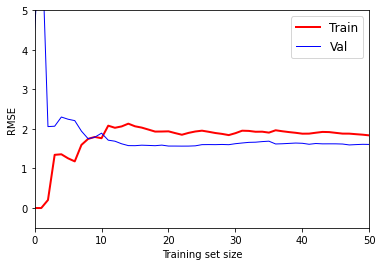

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=42)
    train_errors, val_errors = [], []
    
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    
    plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=1, label='Val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend(fontsize=12);
 
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,50,-.5,5]);

> the model that's underfitting. First let's look at when have a few of instance RMSE close to 0 but when have more instance its increase

let's look at the learning curve of a 10th-degree polynomial model

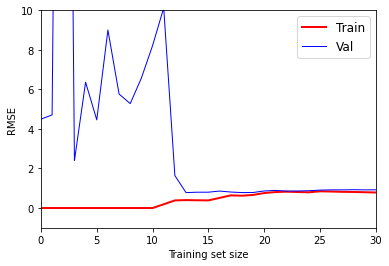

In [63]:
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([ 
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_ref',LinearRegression())
])

plot_learning_curves(polynomial_reg,X,y)
plt.axis([0,30,-1,10]);

> the model it's pretty good(have lower loss than LinearRegression) but it's slighly overfitting(have some space between Traning and Val RMSE) it's will closer if more train data

## Regularized Linear Models

good way to reduce overfitting is to tegularize the model(constrain it). A simple way to regularize a polynomial model is to reduce a degrees.

for LinearModel, is typically constraining the weights of the model. 
* Ridge Regression
* Lasso Regression
* Elastic Net

which implement three different ways to constrain the weights.

### Ridge Regression
force the learning algorithm to keep the model weights as small as possible.

*Equation* | J(θ) = MSE(θ) + α/2 * SUM(i->n)θ**2

α : is controls how mush you want to regularize the model. if α = 0, the is just a LinearRegression, if α is very large then all weights end up very close to zero and the result is a flatline


In [64]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky') # André-Louis Cholesky : Matrix factorization
ridge_reg.fit(X,y) 
ridge_reg.predict([[1.5],[2.3]])

array([[4.82497007],
       [5.49773363]])

which uses L2 is called Ridge Regression.

In [65]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5],[2.3]])

array([4.80078479, 5.47383353])

> L2 is  Ridge Regression!

### Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* , use the L1 norm of the weight. forces the coefficients to to zero, which shrinks the coefficients and makes the model more parsimonious(have fewer parameters).

*Equation* |  J(θ) = MSE(θ) + α * SUM(i->n)abs(θ)

In [66]:
from sklearn.linear_model import Lasso

Lasso_reg = Lasso(alpha=.1)
Lasso_reg.fit(X,y)
Lasso_reg.predict([[1.5],[2.3]])

array([4.77621741, 5.42575041])

In [67]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5],[2.3]])

array([4.79555822, 5.46564502])

### Elastic Net

is a middle ground between Ridge and Lasso Regression, can control with radio r. when r = 0 is a Ridge and when r = 1, it's qeuivalent to Lasso Regression.

In [68]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=.1, l1_ratio=.5) # middle ratio
elastic_net.fit(X,y)
elastic_net.predict([[1.5],[2.3]])

array([4.78114505, 5.43302606])

> what should we use? : by default it use *Ridge Regression* but if you suspect that only a few features are useful. you should prefer Lasso or Elastic Net. In gereal *Elastic Net* is preferred over *Lasso* because Lasso may behave erratically.

## Early Stopping

Stop training as soon as the validation error reaches a minimum.

>fit_trainform vs transform 
* **transform** : you don't know "your future data" so you cannot use X_test data for fitting anything! 

> **warm-starting** approach enables us to start training from a better initial point

In [69]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=42)

poly_scaler = Pipeline([ 
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

SGD_model = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
MSE = []

for epoch in range(1000):
    SGD_model.fit(X_train_poly_scaled, y_train.ravel()) # just 1 epoch (from max_iter for each time)
    y_val_predict = SGD_model.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    MSE.append(val_error)

    if val_error < minimum_val_error :
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(SGD_model)


print('best epoch :',best_epoch)
print('min_MSE : ',minimum_val_error.round(4))

best epoch : 3
min_MSE :  15.0134


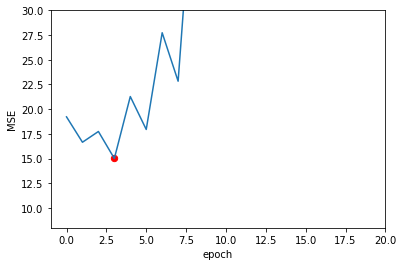

In [70]:
plt.plot(list(range(1000)),MSE)
plt.scatter(best_epoch,minimum_val_error,s=40,c='r')
plt.axis([-1,20,8,30])
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

## Logistic Regression

use to estimate probabillity that instance belongs to a particular class (e.g., what is the probabillity that this email is sapm?)

*Estimate Probabilities*: instead of outputting the result durecly like Linear does, it outputs th *logistic*(sigmoid function) of the result(return number between 0 and 1).

**Equation** | 1/(1+exp(-x)) 

In [71]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

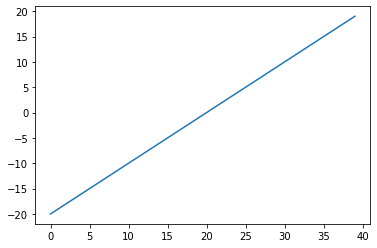

In [72]:
plt.plot(list(range(40)),list(range(-20,20)));

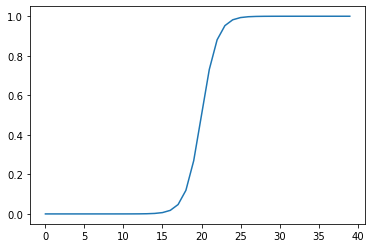

In [73]:
plt.plot(list(range(40)),sigmoid(np.arange(-20,20)));

## Decistion Boundaries

In [74]:
from sklearn import datasets

IRIS = datasets.load_iris()
IRIS.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [75]:
X = IRIS['data'][:,3] # petal width
y = (IRIS['target'] == 2)*1 # 1 if Iris vitginica else 0
X = X.reshape(-1,1) # x expect 2D array

X[:10], y[:10]

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [76]:
from sklearn.linear_model import LogisticRegression

Logis_model = LogisticRegression()
Logis_model.fit(X,y)

LogisticRegression()

In [77]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = Logis_model.predict_proba(X_new) # predict probably
y_proba[-10:]

array([[0.00337683, 0.99662317],
       [0.00333332, 0.99666668],
       [0.00329037, 0.99670963],
       [0.00324797, 0.99675203],
       [0.00320611, 0.99679389],
       [0.0031648 , 0.9968352 ],
       [0.00312401, 0.99687599],
       [0.00308375, 0.99691625],
       [0.003044  , 0.996956  ],
       [0.00300477, 0.99699523]])

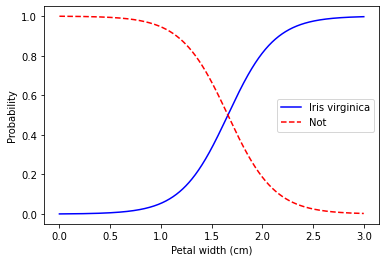

In [78]:
plt.plot(X_new, y_proba[:,1], 'b-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'r--', label='Not')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

> The petal width of *Iris virginica* Decision boundary range from 1.6 cm to 3.0 cm

In [79]:
Logis_model.predict([[1.4],[1.5],[1.6],[1.7],[1.8]])

array([0, 0, 0, 1, 1])

## Softmax Regression 

also known as softargmax: or normalized exponential function,:is a generalization of the logistic function to multiple dimensions. 

using to predict with multiclassification 

In [80]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [81]:
X = IRIS['data'][:,2:4] # petal length, petal width
y = IRIS['target']

# lbfgs is support softmax 
Softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10)
Softmax_model.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [82]:
Softmax_model.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

> 94 % is class 2

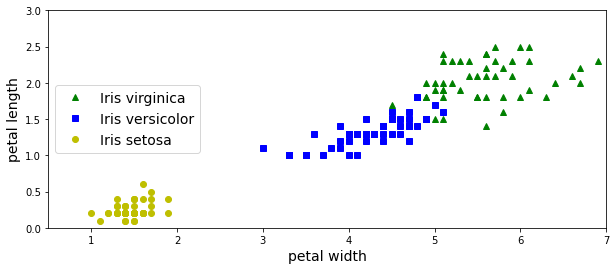

In [83]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.xlabel('petal width',fontsize=14)
plt.ylabel('petal length',fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0.5, 7, 0, 3])
plt.show()

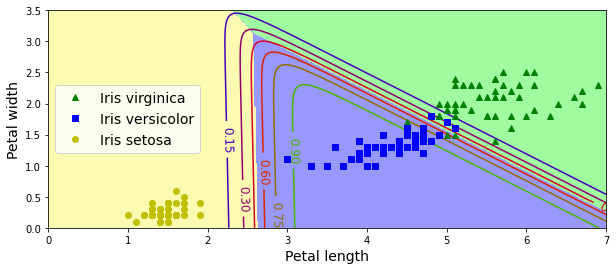

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = Softmax_model.predict_proba(X_new)
y_predict = Softmax_model.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=2, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()